<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.







In [ ]:
import numpy as np
import math

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

In [ ]:
#Creemos la función de la serie alternante e^-x.
def serieAlternante(x,n):
  exponencial = 0
  for i in range(n):
    exponencial += ((-1)**i)*(x**i/math.factorial(i))
  #return format(exponencial, 'e')
  return exponencial
#Comparemos con la función de numpy
x=10
n = 100

expSerie = serieAlternante(x,n)
expNumpy = np.exp(-x)
print(f'La serie nos da: {expSerie} mientras que la función de numpy da: {expNumpy}')

La serie nos da: 4.5399929433607724e-05 mientras que la función de numpy da: 4.5399929762484854e-05


In [ ]:
#Veamos el error.
error = expNumpy - expSerie
print(f'la diferencia entre los dos resultados es de {error}')

la diferencia entre los dos resultados es de 3.2887713006472113e-13


In [ ]:
#Ahora comparemos con un x<=1
print(f'Serie: {serieAlternante(-10,1000)} y la función: {np.exp(-10)}')

Serie: 22026.46579480671 y la función: 4.5399929762484854e-05



- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

In [ ]:
#Ahora vamos a encontrar el N para el cual se cumple la desigualdad
#En este caso para x=0.5.
#De esta manera nos aseguramos de encontrar un N para el cual el error no sea mayor que 10e-7.
N = 0
condicionError = True
condicion = 0
error = 10**(-7)
x = 0.5
while condicionError:
  condicion = abs(((-x)**(N+1))/math.factorial(N+1))
  serie = abs(error*float(serieAlternante(x,N)))
  if condicion <= serie:
    condicionError = False
    break
  N +=1
print(f'El valor de N es :{N}')

El valor de N es :8



- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

In [ ]:
x = 10
n = np.arange(100)
numerosSerie = np.zeros(100)
for i in n:
  numerosSerie[i] = serieAlternante(10,i)

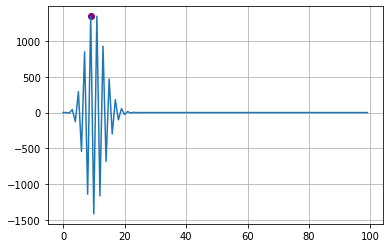

In [ ]:
#Grafiquemos la solución.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(n,numerosSerie)
ax.scatter(9,numerosSerie[x-1], color='purple')
plt.grid()
plt.show()

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

In [ ]:
#Creemos la función de la serie alternante e^-x.
def serieEuler(x,n):
  if (n==0):
    return 1
  exponencial = 0
  for i in range(n):
    exponencial += (x**i/math.factorial(i))
  return 1/exponencial

#Comparemos con la función de numpy
x=10
n = 1000

expSerie = serieEuler(x,n)
expAlternante = serieAlternante(x,n)
print(f'La serie nos da: {expSerie} mientras que la serie alternante: {expAlternante}')

La serie nos da: 4.539992976248486e-05 mientras que la serie alternante: 4.5399929433607724e-05


In [ ]:
#Veamos la diferencia entre esta última serie y la serie alternante.
diferencia = float(expSerie) - float(expAlternante)
diferencia

3.288771368409847e-13

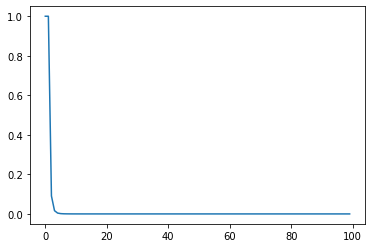

In [ ]:
#Grafiquemos para cada n en los primeros 100.
x = 10
n = np.arange(100)
numerosSerie = np.zeros(100)
for i in n:
  numerosSerie[i] = serieEuler(10,i)
#Grafiquemos la solución.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(n,numerosSerie)
plt.show()

By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

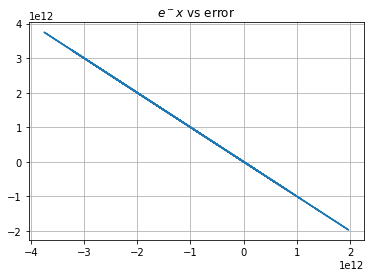

In [ ]:
#Hallemos e⁻x para cada x desde 1 hasta 10.
x = np.arange(100)
numerosSerie = np.zeros(100)
numerosExpo = np.zeros(100)
for i in x:
  numerosSerie[i] = serieAlternante(i,218)
  numerosExpo[i] = np.exp(-i)
error = numerosExpo - numerosSerie
#Grafiquemos el valor de e^-x vs el error comparado con el exp. de numpy
fig, ax = plt.subplots()
ax.plot(numerosSerie,error)
plt.grid()
plt.title(f'$e^-x$ vs error')
plt.show()
e = serieAlternante(1,100)
e1 = np.exp(1)

- Make a series of graphs of the error versus N for different values of x.

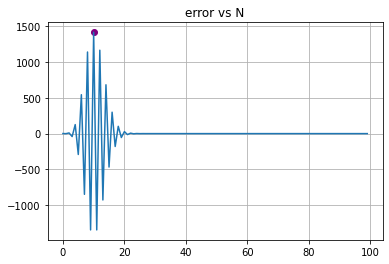

10


In [ ]:
#Hallemos e⁻x para cada x desde 1 hasta 10.
N = np.arange(100)
numerosSerie = np.zeros(100)
numerosExpo = np.zeros(100)
for i in N :
  numerosSerie[i] = serieAlternante(10,i)
  numerosExpo[i] = np.exp(-i)
error = numerosExpo - numerosSerie
#Grafiquemos el valor de e^-x vs el error comparado con el exp. de numpy
fig, ax = plt.subplots()
ax.plot(N,error)
plt.grid()
plt.title('error vs N')
max_y = max(error)
max_id = np.argmax(error)
max_x = N[max_id]
ax.scatter(max_x, max_y, color='purple')
plt.show()
print(max_id)

#Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$

In [ ]:
#Vamos a escribir el programa que realice e imprima los 3 valores.
def seriesSN1(N):
    suma = 0
    sumasParciales = []
    for n in range(0,2*N+1):
        suma += (-1)**(n)*(n/(n+1))
        sumasParciales.append(suma)
    return suma, sumasParciales
  
def seriesSN2(N):
    suma = 0
    sumasParciales = []
    for n in range(1,N+1):
        suma += -((2*n-1)/(2*n)) + (2*n/(2*n+1))
        sumasParciales.append(suma)
    return suma, sumasParciales

def seriesSN3(N):
  suma3 = 0
  sumasParciales = []
  for n in range(1,N+1):
    suma3 += (1/((2*n)*(2*n+1)))
    sumasParciales.append(suma3)
  return suma3 , sumasParciales
numero = 100
print(f'Serie 1= {seriesSN1(numero)[0]}, Serie 2 = {seriesSN2(numero)[0]}, Serie 3 = {seriesSN3(numero)[0]}')

Serie 1= 0.30437144514006564, Serie 2 = 0.30437144514006564, Serie 3 = 0.3043714451400664


- Estudiar la convergencia de la serie para los tres casos.


In [ ]:
numero = 500
serie1 = np.array(seriesSN1(numero)[1])
serie2 = np.array(seriesSN2(numero)[1])
serie3 = np.array(seriesSN3(numero)[1])
#El test de convergencia fue realizado con ayuda de chatgpt.
for i in range(len(serie1)):  
  if serie1[i] > 0.0:
    if (abs(serie1[i]) > abs(serie1[i-i])):
      print(f'La serie converge')
      break
for i in range(1, numero):
  if abs(serie2[i] - serie2[i-1]) < 1e-6:
    print(f"La serie 2 converge a los {i} términos.")
    break
for i in range(1, numero):
  if abs(serie3[i] - serie3[i-1]) < 1e-6:
    print(f"La serie 3 converge a los {i} términos.")
    break

La serie converge
La serie 2 converge a los 499 términos.
La serie 3 converge a los 499 términos.


- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.

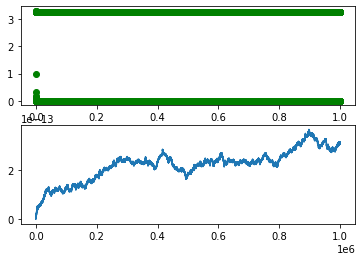

In [ ]:
import matplotlib.pyplot as plt
numero = 1000000
serie1 = np.array(seriesSN1(numero)[1])
serie2 = np.array(seriesSN2(numero)[1])
serie3 = np.array(seriesSN3(numero)[1])
errorRelativoSerie1 = abs((serie1[0:1000000]-serie3)/serie3)
errorRelativoSerie2 = abs((serie2 - serie3)/serie3)
xSerie1 = np.arange(len(errorRelativoSerie1))
xSerie2 = np.arange(len(errorRelativoSerie2))
fig, axs = plt.subplots(2);
axs[0].plot(xSerie1, errorRelativoSerie1,'go')
axs[1].plot(xSerie2, errorRelativoSerie2)

Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro

In [ ]:
#Entre más términos esté operando la máquina, más probabilidad de error existe debido a la aproximación 
#que se hace de los términos, por lo que tendrá más precisión una expresión mucho más resumida.